In [58]:
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2
    
from notebooks.notebook_utils import get_all_models, get_all_transactions, \
                plot_feature_importance, plot_transactions, plot_validation_score, \
                get_metrics_manual_vs_automatic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Utility functions

In [201]:
feature_importance_df = get_all_models()
transaction_set_df = get_all_transactions()

Models: 9
Features: 30
Transactions: 47


## 2. Transactions

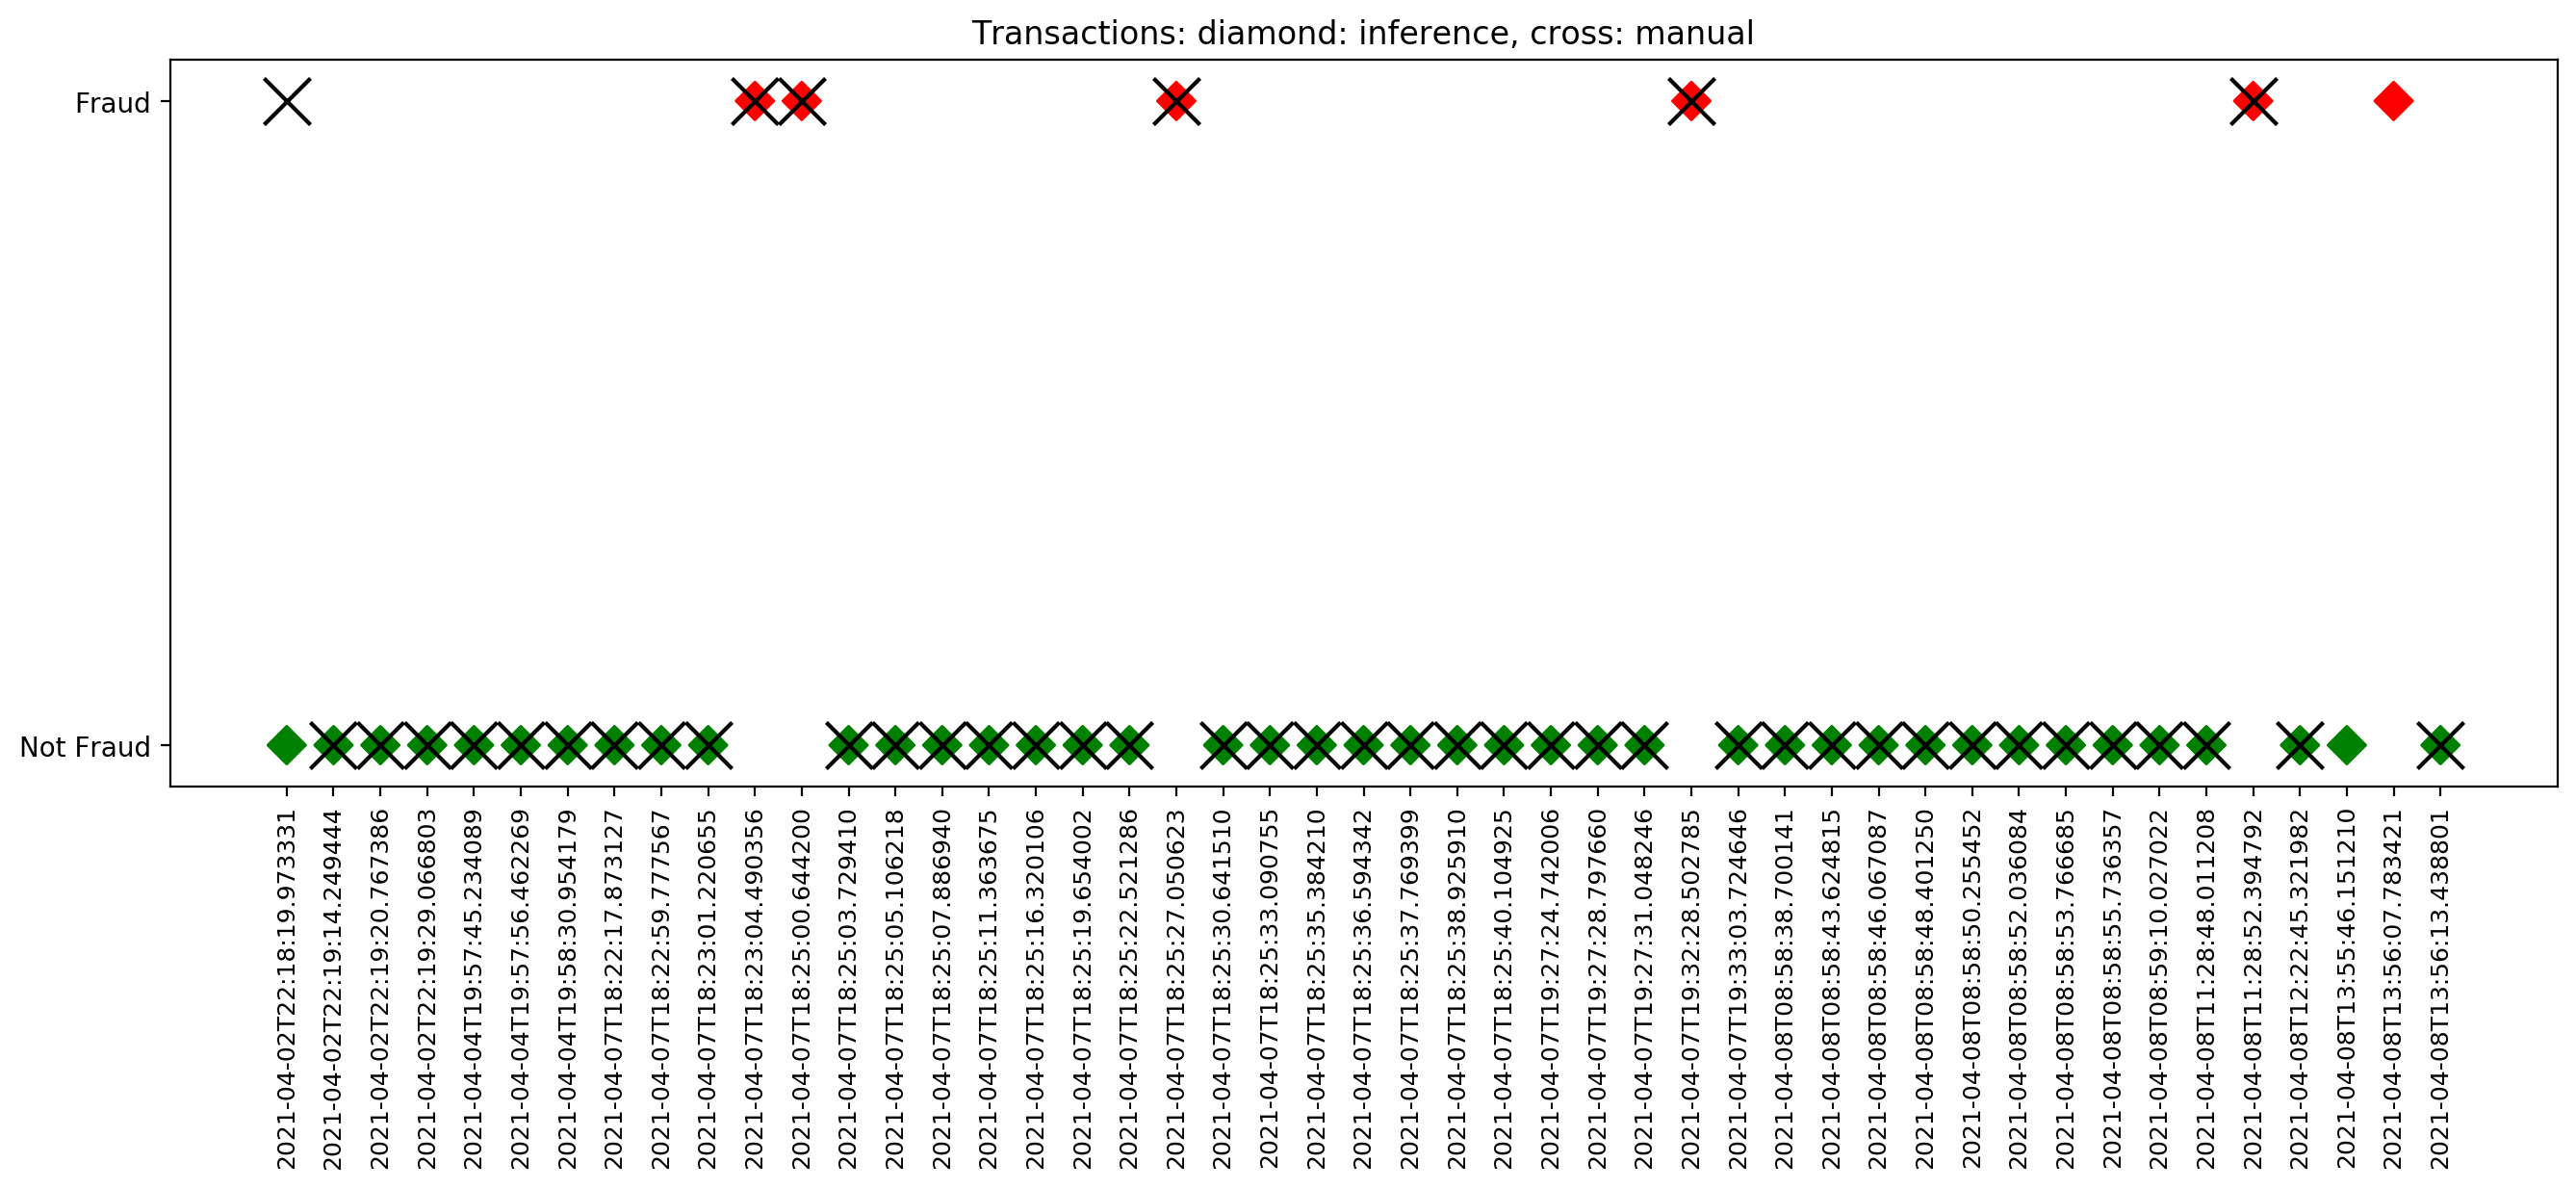

In [202]:
plot_transactions(transaction_set_df, x="timestamp")

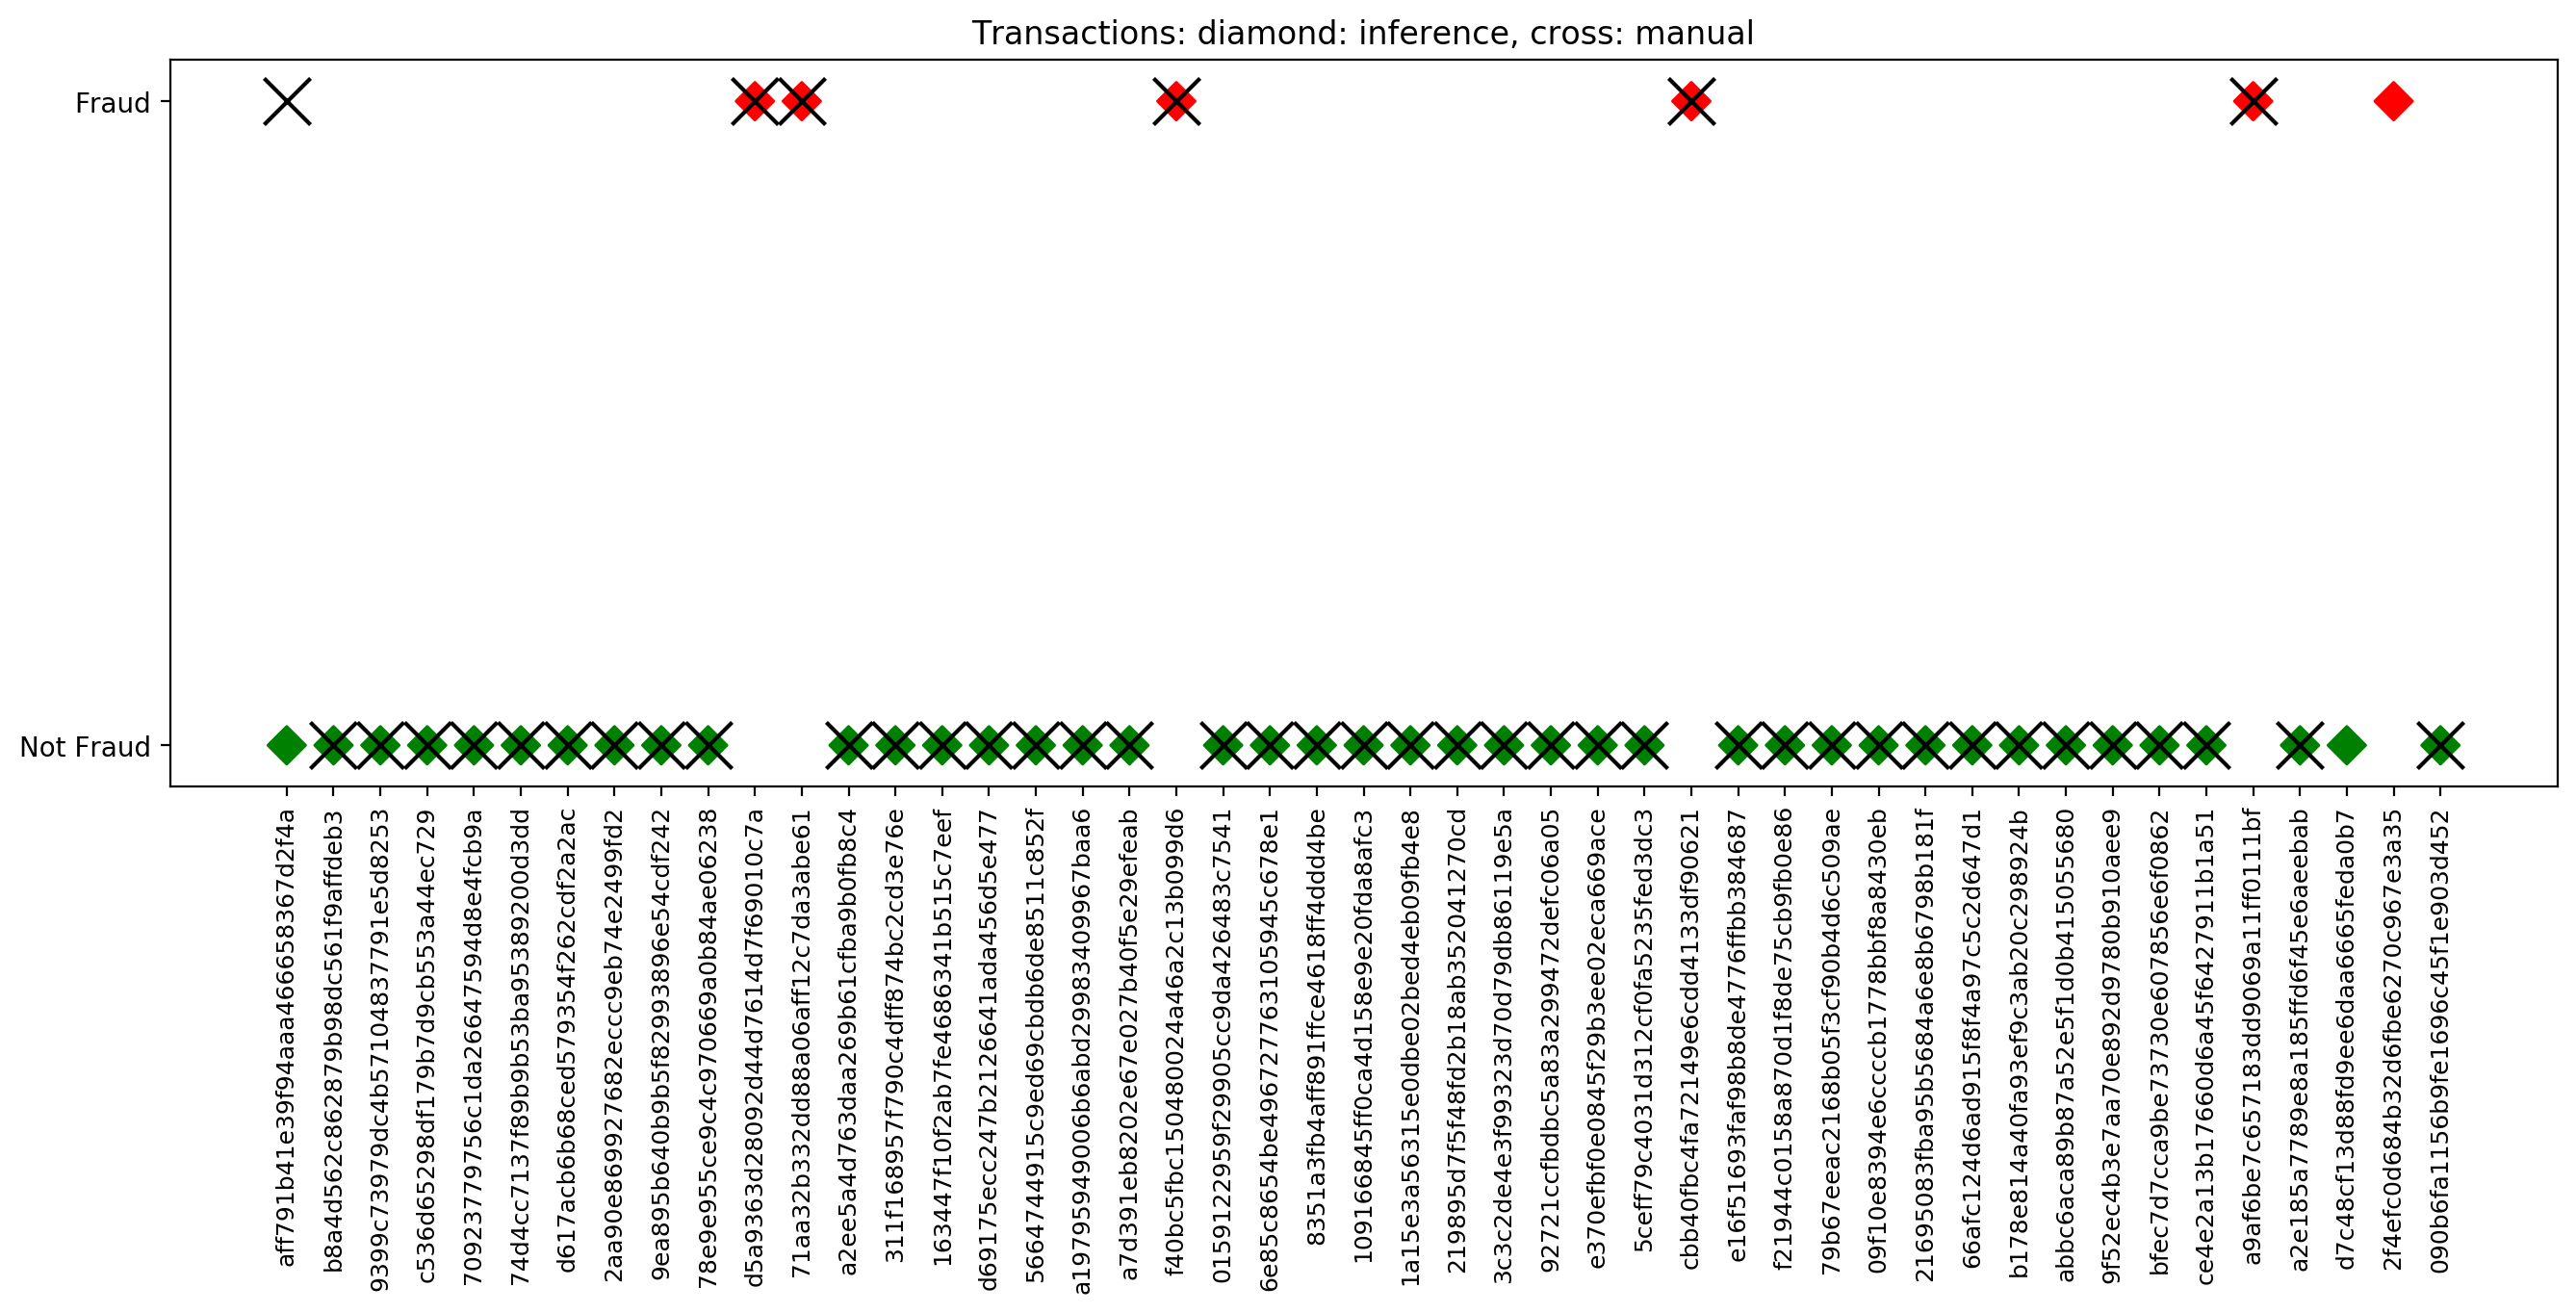

In [203]:
plot_transactions(transaction_set_df, x="transaction_id")

In [204]:
print(f"Transactions not verified: {transaction_set_df.loc[transaction_set_df.manual.isna()].transaction_id.values}")
manual_df = get_metrics_manual_vs_automatic(transaction_set_df)

Transactions not verified: ['2f4efc0d684b32d6fbe6270c967e3a35' 'd7c48cf13d88fd9ee6daa6665feda0b7']
Percent of manual confirmations: 95.745%
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        39
        True       1.00      0.83      0.91         6

    accuracy                           0.98        45
   macro avg       0.99      0.92      0.95        45
weighted avg       0.98      0.98      0.98        45



## 3. Retraining

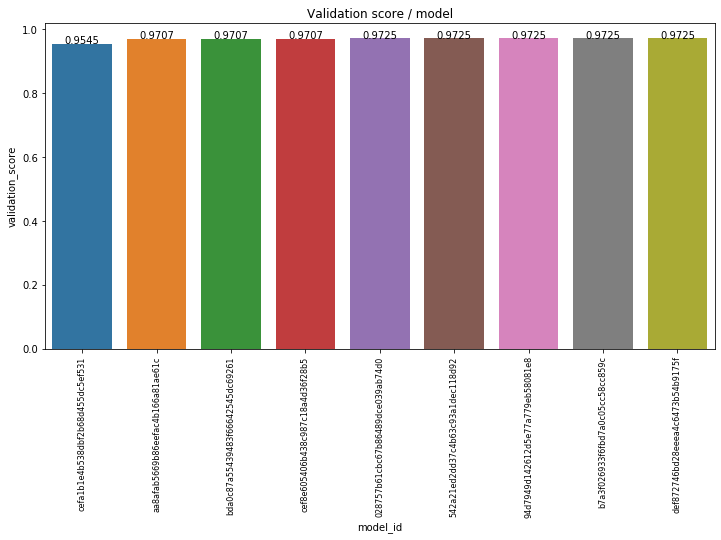

In [199]:
plot_validation_score(feature_importance_df, sort_by="validation_score")

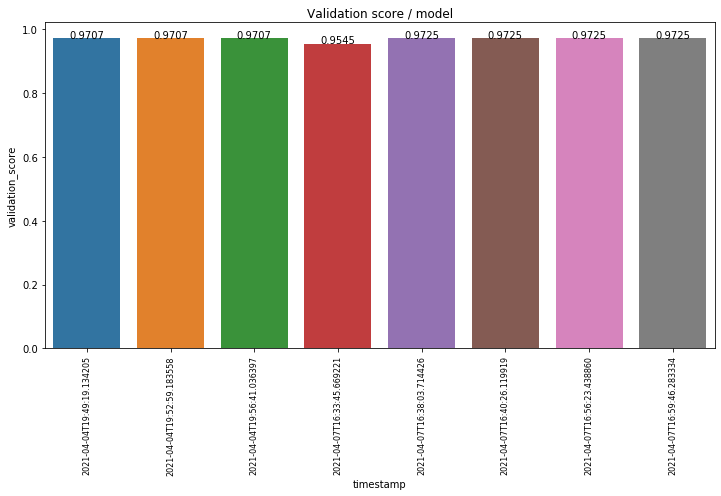

In [181]:
plot_validation_score(feature_importance_df, x="timestamp", sort_by="timestamp")

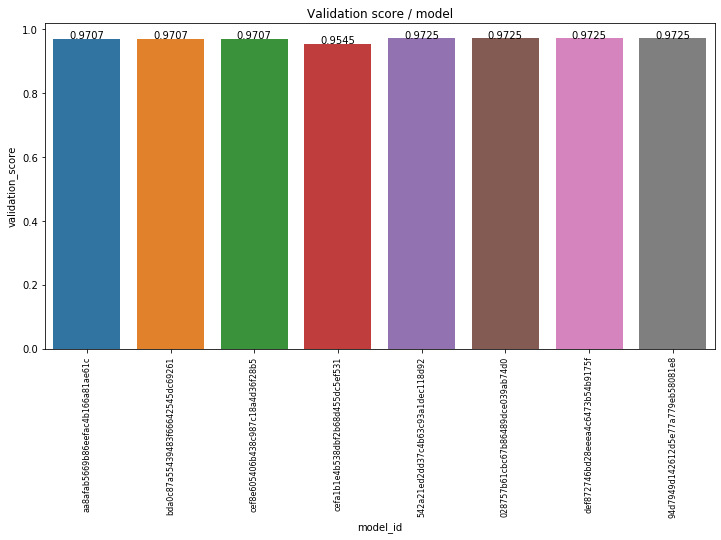

In [182]:
plot_validation_score(feature_importance_df, x="model_id", sort_by="timestamp")

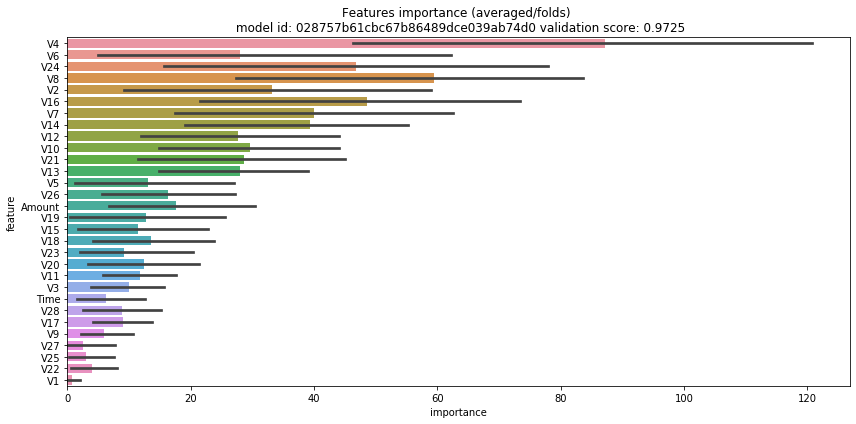

In [200]:
model_id_list = feature_importance_df.model_id.unique()
model_id_list = sorted(model_id_list)
plot_feature_importance(model_id_list[0], feature_importance_df)

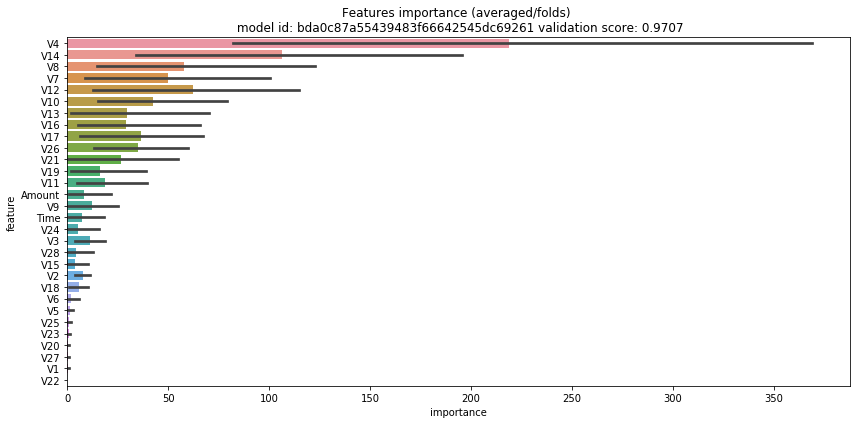

In [184]:
plot_feature_importance(model_id_list[4], feature_importance_df)